In [1]:
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import re

import seaborn

%matplotlib inline
plt.style.use('ggplot')

mpl.rcParams['figure.figsize'] = (12, 12)

In [2]:
for fn in os.listdir('./data/kerneltestdata/uncleandata'):
    with open('./data/kerneltestdata/uncleandata/'+fn, 'r') as fin:
        data = fin.read().splitlines(True)
    with open('./data/kerneltestdata/'+fn, 'w') as fout:
        fout.writelines(data[1:])

In [3]:
bl = pd.read_csv('./data/kerneltestdata/bl2partv3.csv', sep = ',')
c128 = pd.read_csv('./data/kerneltestdata/sync128result.csv', sep = ',')
c256 = pd.read_csv('./data/kerneltestdata/sync256result.csv', sep = ',')
c384 = pd.read_csv('./data/kerneltestdata/sync384result.csv', sep = ',')
c512 = pd.read_csv('./data/kerneltestdata/sync512result.csv', sep = ',')
c768 = pd.read_csv('./data/kerneltestdata/sync768result.csv', sep = ',')
c896 = pd.read_csv('./data/kerneltestdata/result896.csv', sep = ',')
c1024 = pd.read_csv('./data/kerneltestdata/sync1024result.csv', sep = ',')

p1c128 = pd.read_csv('./data/kerneltestdata/1psync128result.csv', sep = ',')
p1c256 = pd.read_csv('./data/kerneltestdata/1psync256result.csv', sep = ',')
p1c384 = pd.read_csv('./data/kerneltestdata/1psync384result.csv', sep = ',')
p1c512 = pd.read_csv('./data/kerneltestdata/1psync512result.csv', sep = ',')
p1c768 = pd.read_csv('./data/kerneltestdata/1psync768result.csv', sep = ',')
p1c896 = pd.read_csv('./data/kerneltestdata/1psync896result.csv', sep = ',')
p1c1024 = pd.read_csv('./data/kerneltestdata/1psync1024result.csv', sep = ',')

nos128 = pd.read_csv('./data/kerneltestdata/nosync128result.csv', sep = ',')
nos256 = pd.read_csv('./data/kerneltestdata/nosync256result.csv', sep = ',')
nos384 = pd.read_csv('./data/kerneltestdata/nosync384result.csv', sep = ',')
nos512 = pd.read_csv('./data/kerneltestdata/nosync512result.csv', sep = ',')
nos768 = pd.read_csv('./data/kerneltestdata/nosync768result.csv', sep = ',')
nos896 = pd.read_csv('./data/kerneltestdata/nosync896result.csv', sep = ',')
nos1024 = pd.read_csv('./data/kerneltestdata/nosync1024result.csv', sep = ',')

ss128 = pd.read_csv('./data/kerneltestdata/single128result.csv', sep = ',')
ss256 = pd.read_csv('./data/kerneltestdata/single256result.csv', sep = ',')
ss384 = pd.read_csv('./data/kerneltestdata/single384result.csv', sep = ',')
ss512 = pd.read_csv('./data/kerneltestdata/single512result.csv', sep = ',')
ss768 = pd.read_csv('./data/kerneltestdata/single768result.csv', sep = ',')
ss896 = pd.read_csv('./data/kerneltestdata/single896result.csv', sep = ',')
ss1024 = pd.read_csv('./data/kerneltestdata/single1024result.csv', sep = ',')

In [4]:
frames1 = [c128,c256,c384,c512,c768,c896,c1024]
frames2 = [p1c128,p1c256,p1c384,p1c512,p1c768,p1c896,p1c1024]
frames3 = [nos128,nos256,nos384,nos512,nos768,nos896,nos1024]
frames4 = [ss128,ss256,ss384,ss512,ss768,ss896,ss1024]
dfsync = pd.concat(frames1, ignore_index=True)
dfp1 = pd.concat(frames2, ignore_index=True)
dfnosync = pd.concat(frames3, ignore_index=True)
dfsingle = pd.concat(frames4, ignore_index=True)
dfsync.columns = dfsync.columns.str.strip()
dfnosync.columns = dfnosync.columns.str.strip()
dfp1.columns = dfp1.columns.str.strip()
dfsingle.columns = dfsingle.columns.str.strip()

In [5]:
#dfsync[dfsync['#size']==4096]
#dfp1.head()


In [6]:
dfsync['avgchunktime']=dfsync.HtDtime/dfsync['no_chunksHtD']
dfnosync['avgchunktime']=dfnosync.HtDtime/dfnosync['no_chunksHtD']
dfsingle['avgchunktime']=dfsingle.HtDtime/dfsingle['no_chunksHtD']
dfp1['avgchunktime']=dfp1.HtDtime/dfp1['no_chunksHtD']
dfsync['type']='synchronized streams'
dfnosync['type']='not synchronized streams'
dfsingle['type']='single stream'
dfp1['type']='single partition synched stream'

In [7]:
tempframes = [dfsync,dfnosync,dfp1,dfsingle]
dftemp=pd.concat(tempframes,ignore_index=True)
dftemp2 = dftemp.loc[dftemp['Kernel']=='partition 2']
dftemp2=dftemp2.append(dfp1)

In [8]:
#dftemp2[dftemp2['#size']==4224]

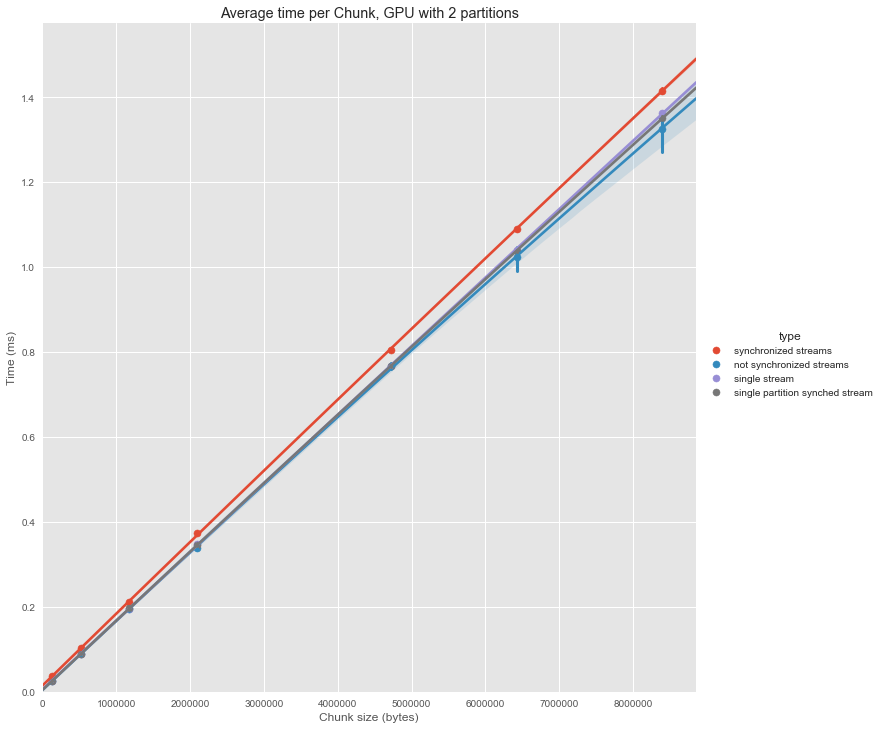

In [29]:
p=seaborn.lmplot(y='avgchunktime', x='chunksize',order=2,hue='type',data=dftemp2,size=10,x_estimator=np.mean)
plt.ylabel('Time (ms)')
plt.xlabel('Chunk size (bytes)')
plt.title('Average time per Chunk, GPU with 2 partitions')
p.set(ylim=(0, None),xlim=(0,None))

In [30]:
syncfit = dfsync.loc[dftemp['Kernel']=='partition 2']
r = np.polyfit(syncfit['chunksize'],syncfit['avgchunktime'],1)
rco = np.corrcoef(syncfit['chunksize'],syncfit['avgchunktime'])[0,1]
r2 = rco**2
print r,r2
t = r[0]*2097152+r[1]
print t,t*96
#syncfit[(syncfit['#size']==2048)]

[  1.67339650e-07   1.51962568e-02] 0.999256759421
0.366132938079 35.1487620556


,#size,mflops,magma_cputime,ATT,totaltime,chunksize,totalsizeHtD,totalsizeDtH,no_chunksHtD,no_chunksDtH,Kernel,HtDtime,Kerneltime,DtHtime,avgchunktime,type
151,2048,17179.869,0.393,130.455,130.467,131072,100663296,33554432,1536,512,partition 2,56.539585,58.536610,15.391136,0.036810,synchronized streams
153,2048,17179.869,0.389,130.489,130.501,131072,100663296,33554432,1536,512,partition 2,56.593281,58.448864,15.459168,0.036845,synchronized streams
155,2048,17179.869,0.372,130.368,130.381,131072,100663296,33554432,1536,512,partition 2,56.519810,58.370625,15.490208,0.036797,synchronized streams
157,2048,17179.869,0.408,130.365,130.377,131072,100663296,33554432,1536,512,partition 2,56.521152,58.489185,15.367136,0.036798,synchronized streams
159,2048,17179.869,0.372,130.537,130.549,131072,100663296,33554432,1536,512,partition 2,56.703201,58.458626,15.387616,0.036916,synchronized streams
431,2048,17179.869,0.381,108.420,108.463,524288,100663296,33554432,384,128,partition 2,38.682560,58.541023,11.239808,0.100736,synchronized streams
433,2048,17179.869,0.388,108.356,108.400,524288,100663296,33554432,384,128,partition 2,38.694305,58.413025,11.292480,0.100766,synchronized streams
435,2048,17179.869,0.603,108.202,108.247,524288,100663296,33554432,384,128,partition 2,38.478367,58.425697,11.342592,0.100204,synchronized streams
437,2048,17179.869,0.428,108.338,108.381,524288,100663296,33554432,384,128,partition 2,38.719486,58.412544,11.249408,0.100832,synchronized streams
439,2048,17179.869,0.419,108.454,108.498,524288,100663296,33554432,384,128,partition 2,38.853474,58.444160,11.200832,0.101181,synchronized streams


In [31]:
fit = dfsingle.loc[dftemp['Kernel']=='partition 2']
r = np.polyfit(fit['chunksize'],fit['avgchunktime'],1)
rco = np.corrcoef(fit['chunksize'],fit['avgchunktime'])[0,1]
r2 = rco**2
print r,r2

[  1.61624378e-07   5.26840541e-03] 0.999365275792


In [32]:
fit = dfp1.loc[dftemp['Kernel']=='partition 2']
r = np.polyfit(fit['chunksize'],fit['avgchunktime'],1)
rco = np.corrcoef(fit['chunksize'],fit['avgchunktime'])[0,1]
r2 = rco**2
print r,r2

[  1.60780941e-07   4.54775632e-03] 0.999781755785


In [33]:
result = sm.OLS(dftemp2['chunksize'],dftemp2['avgchunktime']).fit()
#result.summary()

In [34]:
dftemp3=dftemp2[dftemp2['chunksize']<1100000]

In [35]:
meanandstd = pd.DataFrame()
for f in tempframes:
    for cs in f.chunksize.unique():
        t = np.mean(f[f['chunksize']==cs])


In [36]:
avg128=np.mean(dftemp[dftemp['chunksize']==131072])
stderr128=np.std(dftemp[dftemp['chunksize']==131072])
var128=np.var(dftemp[dftemp['chunksize']==131072])

print avg128['avgchunktime']
print stderr128['avgchunktime']
print var128['avgchunktime']

0.0281105605479
0.0105892390293
0.00011213198322


In [37]:
avg1024=np.mean(dftemp[dftemp['chunksize']==8388608])
stderr1024=np.std(dftemp[dftemp['chunksize']==8388608])
var1024=np.var(dftemp[dftemp['chunksize']==8388608])


print avg1024['avgchunktime']
print stderr1024['avgchunktime']
print var1024['avgchunktime']



1.34078583
0.0978348577644
0.00957165939379


At this point we're going to calculate a normalized overhead using our baseline
--------------------------------------------------------------------------

In [38]:
bl.columns = bl.columns.str.strip()
#bl.head()

(0, 5000)

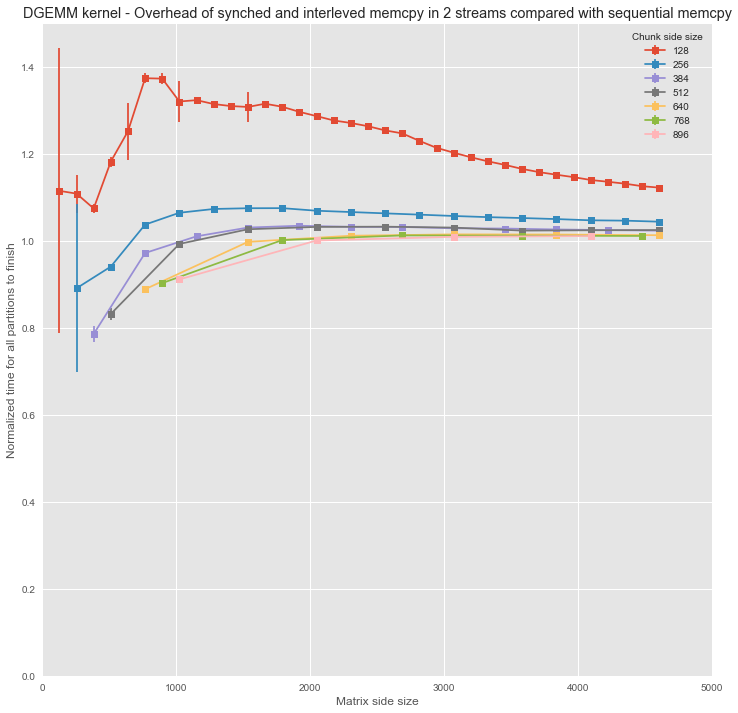

In [70]:
normalizeddf = dfsync.copy()
normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
#normalizeddf = normalized.loc(normalized['Kernel']=='partition 2')
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl['totaltime'][bl['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 
normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
x=normalizeddf['#size'].unique()
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
plt.legend(y['#size'].unique(),title='Chunk side size')
plt.xlabel('Matrix side size')
plt.ylabel('Normalized time for all partitions to finish')
plt.title('DGEMM kernel - Overhead of synched and interleved memcpy in 2 streams compared with sequential memcpy')
plt.ylim(0,1.5)
plt.xlim(0,5000)


(0, 5000)

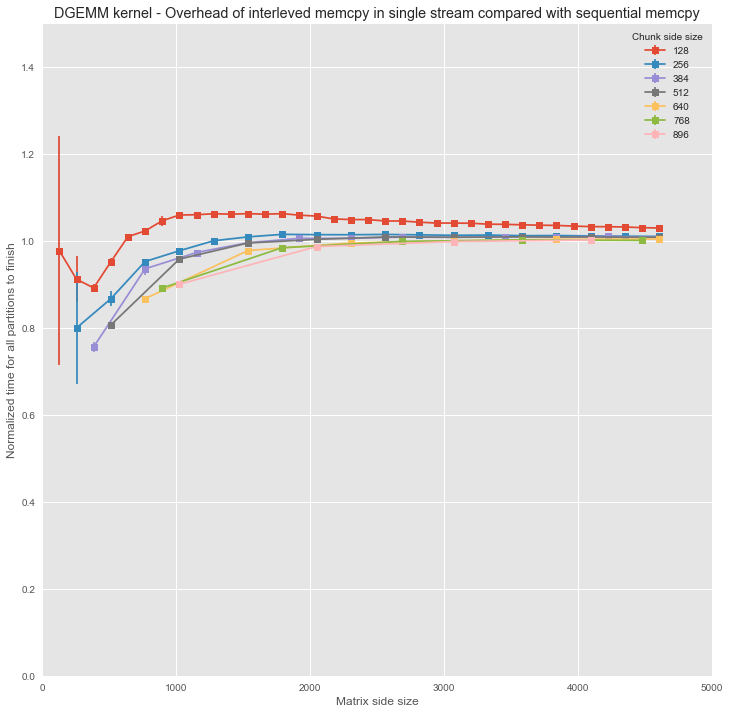

In [71]:
normalizeddf = dfsingle.copy()
normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl['totaltime'][bl['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 

normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
x=normalizeddf['#size'].unique()
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
plt.legend(y['#size'].unique(),title='Chunk side size')
plt.xlabel('Matrix side size')
plt.ylabel('Normalized time for all partitions to finish')
plt.title('DGEMM kernel - Overhead of interleved memcpy in single stream compared with sequential memcpy')
plt.ylim(0,1.5)
plt.xlim(0,5000)

(0, 5000)

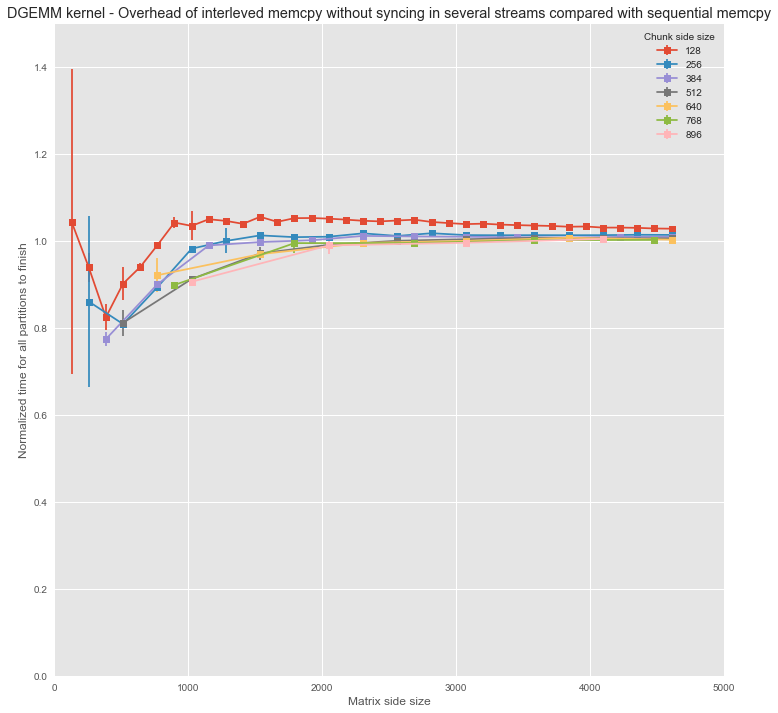

In [72]:
normalizeddf = dfnosync.copy()
normalizeddf = normalizeddf.loc[normalizeddf['Kernel']=='partition 2']
for s in normalizeddf.loc[:,('#size')].unique():
    avg=bl['totaltime'][bl['#size']==s].mean()
    normalizeddf.loc[normalizeddf['#size']==s, 'normalized totaltime'] = normalizeddf['totaltime'].apply(lambda x: x/avg) 

normalizeddf['chunk%']=normalizeddf['chunksize']/(normalizeddf['totalsizeHtD']+normalizeddf['totalsizeDtH'])
y=normalizeddf.groupby(['chunksize','#size'],as_index=False)['normalized totaltime'].mean()
err=normalizeddf.groupby(['chunksize','#size'])['normalized totaltime'].apply(np.std)
x=normalizeddf['#size'].unique()
for s in y['chunksize'].unique():
    yt=y[y['chunksize']==s]
    et=err
    plt.errorbar(yt['#size'],yt['normalized totaltime'],err[s],marker='s')
plt.legend(y['#size'].unique(),title='Chunk side size')
plt.xlabel('Matrix side size')
plt.ylabel('Normalized time for all partitions to finish')
plt.title('DGEMM kernel - Overhead of interleved memcpy without syncing in several streams compared with sequential memcpy')
plt.ylim(0,1.5)
plt.xlim(0,5000)